In [1]:
from torchvision import transforms as T 
from spuco.datasets import SpuCoAnimals 

# Normalization
transform = T.Compose([
            T.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
        ])

trainset = SpuCoAnimals(
    root="/data/",
    label_noise=0.0,
    split="train",
    transform=transform,
)
trainset.initialize()

testset = SpuCoAnimals(
    root="/data/",
    label_noise=0.0,
    split="test",
    transform=transform,
)
testset.initialize()

/home/sjoshi/anaconda3/envs/clip/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/home/sjoshi/anaconda3/envs/clip/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any 

In [4]:
from spuco.models import model_factory
import torch 

model = model_factory("resnet18", trainset[0][0].shape, trainset.num_classes, pretrained=True)
#state_dict = torch.load("erm_model.pt")
#model.load_state_dict(state_dict=state_dict)

In [5]:
from spuco.evaluate import Evaluator 
device = torch.device("cuda:2")
model = model.to(device)
evaluator = Evaluator(
    testset=testset,
    group_partition=testset.group_partition,
    group_weights=trainset.group_weights,
    batch_size=128,
    model=model,
    device=device,
    verbose=True
)
evaluator.evaluate()

Evaluating group-wise accuracy:  12%|█▎        | 1/8 [00:01<00:07,  1.09s/it]

Group (0, 0) Accuracy: 14.0


Evaluating group-wise accuracy:  25%|██▌       | 2/8 [00:02<00:06,  1.10s/it]

Group (0, 1) Accuracy: 2.6


Evaluating group-wise accuracy:  38%|███▊      | 3/8 [00:03<00:05,  1.14s/it]

Group (1, 0) Accuracy: 12.6


Evaluating group-wise accuracy:  50%|█████     | 4/8 [00:04<00:04,  1.15s/it]

Group (1, 1) Accuracy: 17.8


Evaluating group-wise accuracy:  62%|██████▎   | 5/8 [00:05<00:03,  1.14s/it]

Group (2, 2) Accuracy: 17.2


Evaluating group-wise accuracy:  75%|███████▌  | 6/8 [00:06<00:02,  1.14s/it]

Group (2, 3) Accuracy: 14.0


Evaluating group-wise accuracy:  88%|████████▊ | 7/8 [00:07<00:01,  1.15s/it]

Group (3, 2) Accuracy: 55.2


Evaluating group-wise accuracy: 100%|██████████| 8/8 [00:09<00:00,  1.15s/it]

Group (3, 3) Accuracy: 52.8


{(0, 0): 14.0,
 (0, 1): 2.6,
 (1, 0): 12.6,
 (1, 1): 17.8,
 (2, 2): 17.2,
 (2, 3): 14.0,
 (3, 2): 55.2,
 (3, 3): 52.8}

(1, 224, 224)


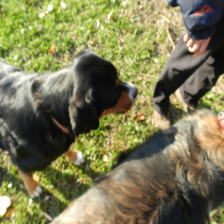

In [8]:
from PIL import Image
from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from torch.utils.data import Subset
from torch.utils.data import Subset 
import numpy as np 

testset = SpuCoAnimals(
    root="/data/",
    label_noise=0.0,
    split="test",
)
testset.initialize()
target_layers = [model.backbone.layer4[-1]]
cam = GradCAM(model=model.backbone, target_layers=target_layers, use_cuda=True)
targets = [ClassifierOutputTarget(3)]
for i in range(4800):
    input_tensor = testset[i][0].unsqueeze(dim=0)
    # You can also pass aug_smooth=True and eigen_smooth=True, to apply smoothing.
    grayscale_cam = cam(input_tensor=input_tensor, targets=targets)
    #print(grayscale_cam.shape)
    grayscale_cam = grayscale_cam[0, :]
    #np_img = np.array(input_tensor[0].permute(1, 2, 0))
    #visualization = show_cam_on_image(np_img, grayscale_cam, use_rgb=True)
    #img = Image.fromarray(visualization)
    #display(T.ToPILImage()(input_tensor[0]))

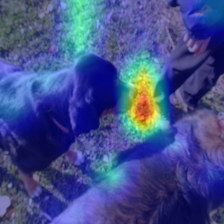

In [43]:
display(img)